<a href="https://colab.research.google.com/github/Oshadha345/Engineering_Mathematics/blob/main/ProbStats%5Cnotes%5CProbability_and_Statistics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Probability

## Sets

In [ ]:
A = {1,2,3,8}
B = {3,8}

In [ ]:
print(1 in A)
print(4 in A)

True
False


In [ ]:
flag = 1 in A
type(flag)

bool

In [ ]:
#Check for subset

print(B.issubset(A))

True


In [ ]:
def check_subset(A,B):
  for element in B:
    if element not in A:
      return False
  return True

print(check_subset(A,B))

True


In [ ]:
def power_set(set):
  power_set = [[]]

  for i in set:
    for subset in power_set:
      power_set = power_set + [subset + [i]]
  return power_set

print(power_set({1,2,3}))

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]


In [ ]:
#Set Operations

import numpy as np

S = set(np.arange(10))
print(S)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
A = set(np.arange(0,10,2))
print(A)

{0, 2, 4, 6, 8}


In [ ]:
B = set(np.arange(1,10,3))
print(B)

{1, 4, 7}


In [ ]:
print(A.union(B))

{0, 1, 2, 4, 6, 7, 8}


In [ ]:
print(A.intersection(B))

{4}


In [ ]:
B.add(6)
print(B)

{1, 4, 6, 7}


In [ ]:
print(A.intersection(B))

{4, 6}


In [ ]:
print(A.difference(B))

{0, 8, 2}


### De Morgan's law

In [ ]:
A_complement = S.difference(A)
print(A_complement)

{1, 3, 5, 7, 9}


In [ ]:
B_complement = S.difference(B)
print(B_complement)

{0, 2, 3, 5, 8, 9}


In [ ]:
A_comp_or_B_comp = A_complement.union(B_complement)
print(A_comp_or_B_comp)

{0, 1, 2, 3, 5, 7, 8, 9}


In [ ]:
A_and_B = A.intersection(B)
print(A_and_B)
comp_A_and_B = S.difference(A_and_B)
print(comp_A_and_B)

{4, 6}
{0, 1, 2, 3, 5, 7, 8, 9}


In [ ]:
print(A_comp_or_B_comp==comp_A_and_B)

True


##Random Variables

In [ ]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
T = sns.load_dataset('titanic')
T.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
print(list(T.survived.unique()))
print(list(T.pclass.unique()))
print(list(T.sex.unique()))
print(list(T.embark_town.unique()))


[0, 1]
[3, 1, 2]
['male', 'female']
['Southampton', 'Cherbourg', 'Queenstown', nan]


## Discrete Distributions

### Discrete Uniform Distribution


Imagine you work at local ccharity, and you have 100 raffle tickets numbered 1 to 100. Every ticket is equally likely to be drawn in a raffle. Your boss challenges you with the follwing tasks:


1. **Empirical Exploration**:
     Simulate 10,000 raffle draws(each draw picks one ticket uniformly at random from 1 to 100)



*   **Question**: What are the empirical mean and variance of the drawn ticket numbers?
*   Expectation: They should be very close to the theoretical mean $E[X] = (1+100)/2 = 50.5$ and the theoretical variance $(100^2-1)/12 = $

   
2.   Visualization Challenge:


*   Plot the histogram of the drawn ticket numbers.
* Overlay the theoretical probability mass function (a constant line at $1/100$ for each ticket).



3. Deep thought:



*   If the raffle were held every day for a year (365 days), how likely is it that the average ticket number drawn over those days deviates significantly (say by more than 5 points) from the theoretical mean?
*   (Hint: You can use simulation to approximate the distribution of the sample mean over 365 draws.)









In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


#setting seed for reproducibility of random number set
np.random.seed(42)

#Simulating 10,000 rafle ddraws

num_tickets = 100
num_draws = 10000

tickets = np.arange(1,num_tickets+1)


#draw sample uniformly from the tickets array
draws = np.random.choice(tickets,size=num_draws, replace=True)

#compute the empirical mean value and variance

empirical_mean = np.mean(draws)
empirical_varinace = np.var(draws)

print("----------Empirical Mean and Variance-------------")
print(f" Empirical Mean: {empirical_mean}")
print(f" Empirical Variance: {empirical_varinace}")
print("\n\n")

#compute the theoretical mean value and variance
print("----------Theoretical Mean and Variance-------------")

theoretical_mean = (1+num_tickets)/2
theoretical_variance = (num_tickets**2-1)/12

print(f" Theoretical Mean: {theoretical_mean}")
print(f" Theoretical Variance: {theoretical_variance}")

----------Empirical Mean and Variance-------------
 Empirical Mean: 50.2942
 Empirical Variance: 833.2454463600001



----------Theoretical Mean and Variance-------------
 Theoretical Mean: 50.5
 Theoretical Variance: 833.25


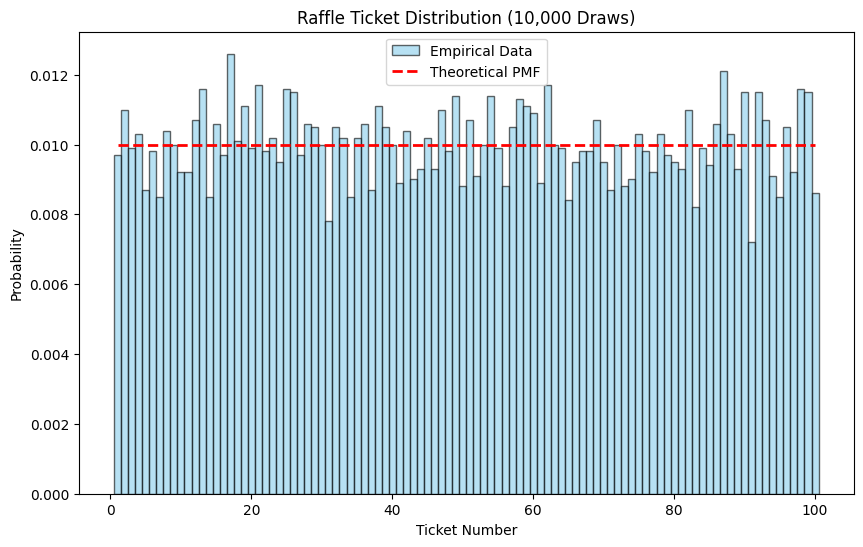

In [ ]:
#visualizing the distribution

#histogram with theoretical PMF overlay

plt.figure(figsize=(10,6))
counts, bins, patches = plt.hist(draws, bins=np.arange(1,num_tickets+2)-0.5, density=True,
                                 alpha=0.6, color='skyblue',edgecolor='black',label='Empirical Data')

# The theoretical PMF is constant for each ticket
pmf = np.full(num_tickets, 1/num_tickets)
plt.plot(tickets, pmf,'r--',linewidth=2,label='Theoretical PMF')
plt.title('Raffle Ticket Distribution (10,000 Draws)')
plt.xlabel('Ticket Number')
plt.ylabel('Probability')
plt.legend()
plt.show()


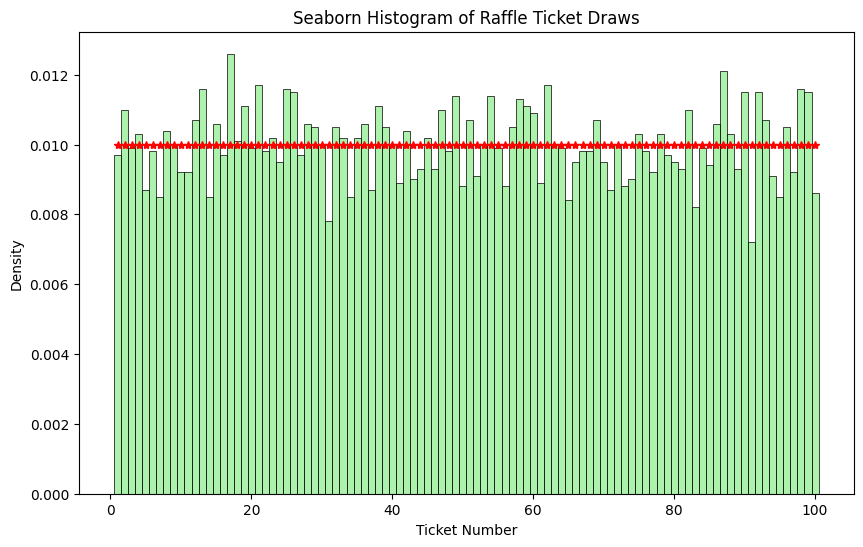

In [ ]:
# Seaborn version (with KDE - though note KDE for discrete uniform is not ideal, it still illustrates the idea)

plt.figure(figsize=(10, 6))
sns.histplot(draws, bins=np.arange(1, num_tickets + 2)-0.5, stat='density', color='lightgreen', edgecolor='black')

plt.plot(tickets,pmf,'*r',linewidth=2,label='Theoretical PMF')
plt.title('Seaborn Histogram of Raffle Ticket Draws')
plt.xlabel('Ticket Number')
plt.ylabel('Density')
plt.show()

In [ ]:
#skewness and Kurtosis

from scipy.stats import skew, kurtosis

#empirical skewness and kurtosis

empirical_skewness = skew(draws)
empirical_kurtosis = kurtosis(draws)
print("Empirical Skewness:", empirical_skewness)
print("Empirical Excess Kurtosis:", empirical_kurtosis)

Empirical Skewness: 0.018207575577409624
Empirical Excess Kurtosis: -1.2018232465464498


In [ ]:
#theoretical skewness and kurtosis

theoretical_skewness = 0
theoretical_excess_kurtosis = - (6 * (num_tickets**2 + 1)) / (5 * (num_tickets**2 - 1))
print("Theoretical Skewness:", theoretical_skewness)
print("Theoretical Excess Kurtosis:", theoretical_excess_kurtosis)

Theoretical Skewness: 0
Theoretical Excess Kurtosis: -1.2002400240024003


In [ ]:
#Explore the Distribution of the Sample Mean over 365 Draws for 5000 years

num_days = 100
num_experiments = 5000 #simulate for 5000 year, otherwise mean and variance could heavily deviate
annual_mean = []

for _ in range(num_experiments):
  daily_draws = np.random.choice(tickets, size=num_days, replace=True)
  annual_mean.append(np.mean(daily_draws))

annual_means = np.array(annual_mean)
means_of_mean = np.mean(annual_means)
std_of_means = np.std(annual_means)

print(f"Mean of the Sample Means: {means_of_mean}")
print(f"Standard Deviation of the Sample Means: {std_of_means}")
print("")

# What proportion of annual means deviate by more than 5 from the theoretical mean 50.5?
deviations = np.abs(annual_means - theoretical_mean)
proportional_deviation = np.mean(deviations > 5)
print("Proportion of years with mean deviation > 5:", proportional_deviation)


Mean of the Sample Means: 50.503664
Standard Deviation of the Sample Means: 2.8769452436749643

Proportion of years with mean deviation > 5: 0.0796


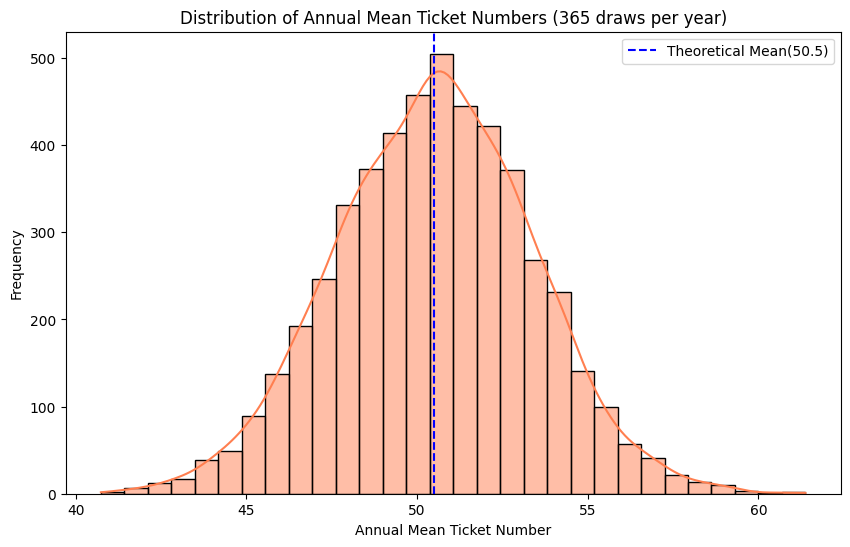

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(annual_means,bins=30,kde=True,color='coral',edgecolor='black')
plt.title('Distribution of Annual Mean Ticket Numbers (365 draws per year)')
plt.xlabel('Annual Mean Ticket Number')
plt.ylabel('Frequency')
plt.axvline(theoretical_mean,color='blue',linestyle='--',label='Theoretical Mean(50.5)')
plt.legend()
plt.show()

This graph represent the nature of CLT, if we itterate the experiment large number of times, mean of the experiments represent a normal distribution like in the above graph. If we consider an individual experiment it a has a uniform discrete distribution, means of experiment has a continuous normal distribution.

In [ ]:
#empirical skewness and kurtosis

empirical_skewness = skew(annual_means)
empirical_kurtosis = kurtosis(annual_means, fisher=True) # Fisher's definition (normal dist = 0)


print(f"Skewness of Sample Mean Distribution: {empirical_skewness:.4f}")
print(f"Kurtosis of Sample Mean Distribution: {empirical_kurtosis:.4f}")

Skewness of Sample Mean Distribution: 0.0043
Kurtosis of Sample Mean Distribution: -0.0026


* Skewness:
  * The distribution of the sample mean should be approximately 0 due to the CLT (symmetry).
  
  * If the skewness is close to 0, it confirms the normality of the sample mean distribution.

* Kurtosis:

    * A normal distribution has kurtosis 0 (Fisher’s definition).
    * If kurtosis ≈ 0, the sample mean distribution is normal-like.
    * If kurtosis > 0, the distribution has heavier tails than normal (leptokurtic).
    * If kurtosis < 0, it has lighter tails than normal (platykurtic).

### Binomial Distribution

PMF of Binomial Distribution:

$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k} ; k = 0,1,2,...,n$

* $\binom{n}{k} = \frac{n!}{(n-k)!k!}$
* $p^k$ is the probability of $n-k$ failures.
* $(1-p)^{n-k}$ is the probability of $n-k$ failures.

Expected Value and Variance:

* Expected Value(Mean):

  * $E[X]=n.p$

* Variance:
  * $V[X] = n.p.(1-p)$

* Skewness:
  * Skewness = $\frac{1-2p}{\sqrt{np(1-p)}}$
  * When p=0.5, the distribution is symmetric(skewness =0).


* Excess Kurtosis:
  * Excess Kurtosis = $\frac{1-6p(1-p)}{np(1-p)}$
  * A normal distribution has an excess kurtosis of 0. For the binomial distribution, the kurtosis depends on both 𝑛 and p and typically decreases (gets closer to normal) as n increases.







Imagine you are coaching a basketball team. One of your players has a free throw success rate of 𝑝=0.7
. In a practice session, the player takes n=15 free throws. You want to understand:

1. Probability Challenge:

   * What is the probability that the player makes exactly 10 free throws?

2. Aggregate Performance:
   * What are the expected number of made free throws and the variance?

3. Distribution Shape:
  * How skewed is the distribution, and what does that tell you about performance variability?

4. Visualization Challenge:
   * Simulate many sessions and plot the histogram of successes, comparing it to the theoretical PMF.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, skew, kurtosis

#setting parameters for binomial distribution

n = 15
p = 0.7

#calculate theoretical PMF for k-0,1,2,...,n

k_values = np.arange(0,n+1)
theoretical_pmf = binom.pmf(k_values, n, p)


#display thr theoretcial probabilities
print("The Theoretcial Probabilities\n")
for k, prob in zip(k_values, theoretical_pmf):
  print(f"P(X={k}) = {prob:.4f}")

print("___________________________________________________________")
print("")
#theoretical mean and variance

theoretical_mean = n*p
theoretical_variance = n*p*(1-p)

print(f"\nTheoretical Mean: {theoretical_mean:.2f}")
print(f"Theoretical Variance: {theoretical_variance:.2f}")

print("")
print("___________________________________________________________")
print("")

# theoretical skewness and excess kurtosis
theoretical_skewness = (1 - 2 * p) / np.sqrt(n * p * (1-p))
theoretical_excess_kurtosis = (1 - 6 * p * (1-p)) / (n * p * (1-p))

print(f"Theoretical Skewness: {theoretical_skewness:.4f}")
print(f"Theoretical Excess Kurtosis: {theoretical_excess_kurtosis:.4f}")

print("")
print("___________________________________________________________")

The Theoretcial Probabilities

P(X=0) = 0.0000
P(X=1) = 0.0000
P(X=2) = 0.0000
P(X=3) = 0.0001
P(X=4) = 0.0006
P(X=5) = 0.0030
P(X=6) = 0.0116
P(X=7) = 0.0348
P(X=8) = 0.0811
P(X=9) = 0.1472
P(X=10) = 0.2061
P(X=11) = 0.2186
P(X=12) = 0.1700
P(X=13) = 0.0916
P(X=14) = 0.0305
P(X=15) = 0.0047
___________________________________________________________


Theoretical Mean: 10.50
Theoretical Variance: 3.15

___________________________________________________________

Theoretical Skewness: -0.2254
Theoretical Excess Kurtosis: -0.0825

___________________________________________________________


In [ ]:
#simulating free throw sessions

num_session = 10000000
simulated_successes = np.random.binomial(n, p, size=num_session)

#empirical calculations

empirical_mean = np.mean(simulated_successes)
empirical_variance = np.var(simulated_successes)
empirical_skewness = skew(simulated_successes)
empirical_excess_kurtosis = kurtosis(simulated_successes)

print("Empirical Mean:", empirical_mean)
print("Empirical Variance:", empirical_variance)
print("Empirical Skewness:", empirical_skewness)
print("Empirical Excess Kurtosis:", empirical_excess_kurtosis)

Empirical Mean: 10.5008192
Empirical Variance: 3.1510767289113613
Empirical Skewness: -0.2252803050635705
Empirical Excess Kurtosis: -0.08133207170945012


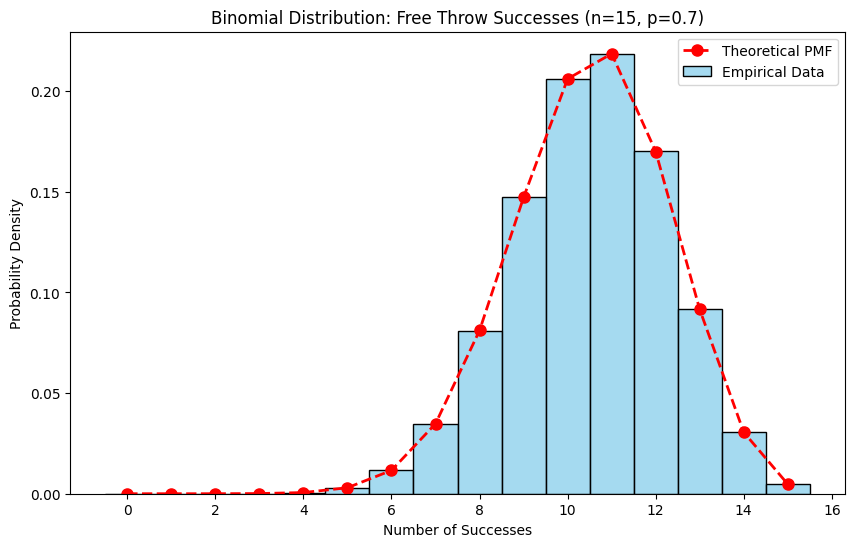

In [ ]:
#visualization

plt.figure(figsize=(10,6))
sns.histplot(simulated_successes, bins = np.arange(-0.5,n+1.5,1),stat='density', color='skyblue',edgecolor='black',label='Empirical Data')
plt.plot(k_values, theoretical_pmf,'ro--',linewidth=2,markersize=8,label='Theoretical PMF')
plt.title('Binomial Distribution: Free Throw Successes (n=15, p=0.7)')
plt.xlabel('Number of Successes')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


## Continuous Distribution

### Exponential Distribution

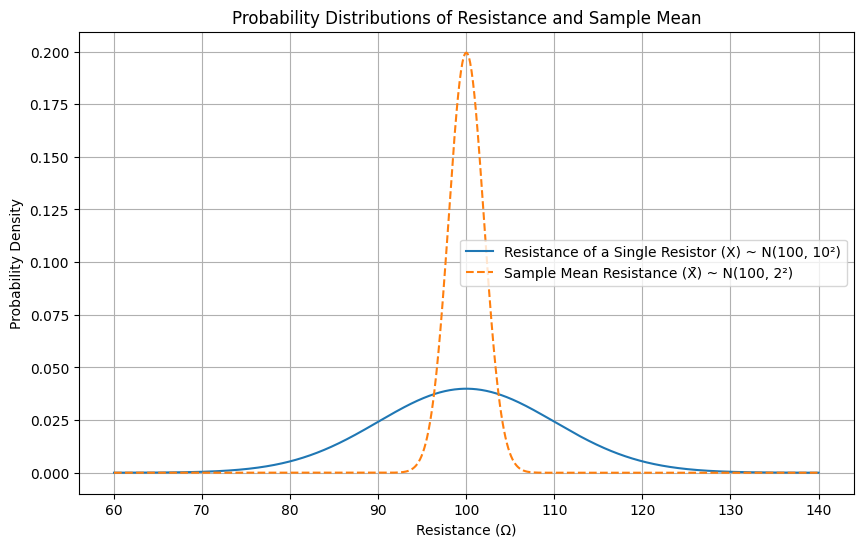

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters
mu = 100
sigma_X = 10
sigma_X_bar = 2

# Create a range of x values
x = np.linspace(mu - 4*sigma_X, mu + 4*sigma_X, 1000)

# PDF of X (Resistance of a single resistor)
pdf_X = norm.pdf(x, mu, sigma_X)

# PDF of X_bar (Sample mean resistance)
pdf_X_bar = norm.pdf(x, mu, sigma_X_bar)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_X, label="Resistance of a Single Resistor (X) ~ N(100, 10²)")
plt.plot(x, pdf_X_bar, label="Sample Mean Resistance (X̄) ~ N(100, 2²)", linestyle="--")
plt.title("Probability Distributions of Resistance and Sample Mean")
plt.xlabel("Resistance (Ω)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

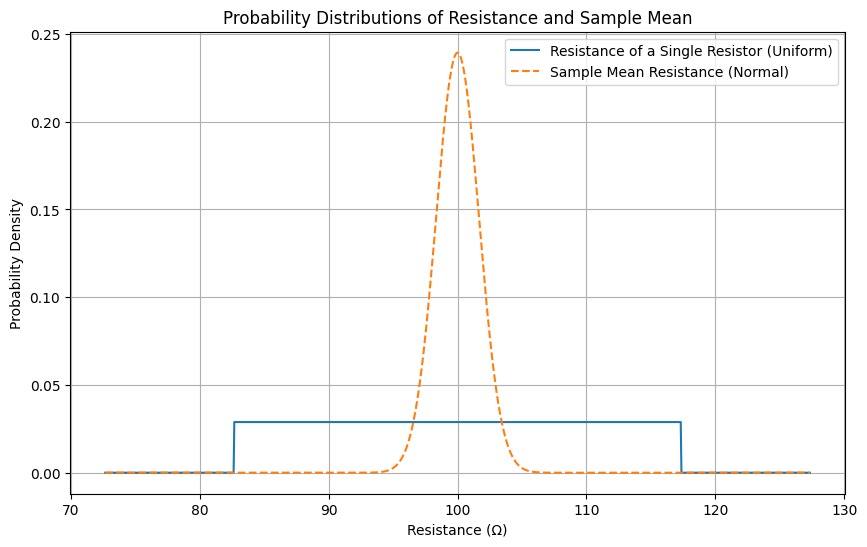

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

# Parameters for the uniform distribution
a = 82.68
b = 117.32
mu = 100
sigma_X_bar = 10 / np.sqrt(36)

# Create a range of x values
x = np.linspace(a - 10, b + 10, 1000)

# PDF of X (Uniform distribution)
pdf_X = uniform.pdf(x, loc=a, scale=b - a)

# PDF of X_bar (Normal distribution)
pdf_X_bar = norm.pdf(x, mu, sigma_X_bar)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_X, label="Resistance of a Single Resistor (Uniform)")
plt.plot(x, pdf_X_bar, label="Sample Mean Resistance (Normal)", linestyle="--")
plt.title("Probability Distributions of Resistance and Sample Mean")
plt.xlabel("Resistance (Ω)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()